In [1]:
# 패키지 참조

import pandas as pd
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import sys
from os import path, mkdir
import folium

In [2]:
# 데이터 불러오기
origin = read_excel("../Excel Data/세종시_주유소위치.xlsx")
origin

,지역,상호,주소,상표,전화번호,셀프여부,위도,경도,등록기준일
0,세종특별자치시,세종동부농협주유소,세종특별자치시 부강면 부강외천로 10,NH-OIL,044-868-6145,Y,36.671429,127.217462,2022-10-13
1,세종특별자치시,㈜선인상사 우리나라주유소(명칭변경),세종특별자치시 전의면 운주산로 1032,S-OIL,044-868-2051,N,36.627999,127.289747,2022-10-13
2,세종특별자치시,굿모닝주유소,세종특별자치시 조치원읍 세종로 2712,자가상표,044-862-7712,N,36.625103,127.290555,2022-10-13
3,세종특별자치시,신안주유소,세종특별자치시 조치원읍 세종로 2678,자가상표,044-865-2321,Y,36.731322,127.168313,2022-10-13
4,세종특별자치시,진영주유소,세종특별자치시 소정면 세종로 4732,현대오일뱅크,044-866-0220,Y,36.559414,127.281363,2022-10-13
...,...,...,...,...,...,...,...,...,...
65,세종특별자치시,범한주유소,세종특별자치시 소정면 세종로 4679,S-OIL,044-866-6479,N,36.728124,127.163772,2022-10-13
66,세종특별자치시,SK세종전의주유소(명칭변경),세종특별자치시 전의면 세종로 3907,자가상표,044-866-5883,N,36.678892,127.184938,2022-10-13
67,세종특별자치시,서세종농협주유소,세종특별자치시 연서면 함박로 122,SK에너지,044-867-2124,N,36.575753,127.264680,2022-10-13
68,세종특별자치시,SK엔크린 세종대평주유소(신규 추가),세종특별자치시 대평동 종합운동장로 29,SK에너지,070-4196-7002,Y,36.469020,127.268350,2022-10-13


### Folium으로 시각화

In [5]:
# zoom_start: 배율 1~22 (여기서는 출력 안함)
map_osm=folium.Map(location=[36.4799919, 127.2890511],zoom_start=12)

#마커 클릭시 폰트 색깔 지정
html="<font color='blue' style='white-space:nowrap'><b>%s</b></font>"

#데이터프레임의 행 수만큼 반복하면서 마커 생성
for i in origin.index:
    #행 우선 접근 방식으로 값 추출하기
    name=origin.loc[i,'상호']
    lat=origin.loc[i,'위도']
    lng=origin.loc[i,'경도']

    #추출한 정보를 지도에 표시
    popup_html=folium.Popup(html%name,parse_html=False)
    marker=folium.Marker([lat,lng],popup=popup_html)
    marker.add_to(map_osm)

    #웹 페이지 파일이 저장될 폴더 생성
    # if not path.exists('output'):
    #     mkdir('output')

    map_osm.save('Folium File/세종시_주유소_위치.html') #파일이 저장될 위치

map_osm

In [6]:
# 데이터프레임 copy
df1=origin.copy()
df1

,지역,상호,주소,상표,전화번호,셀프여부,위도,경도,등록기준일
0,세종특별자치시,세종동부농협주유소,세종특별자치시 부강면 부강외천로 10,NH-OIL,044-868-6145,Y,36.671429,127.217462,2022-10-13
1,세종특별자치시,㈜선인상사 우리나라주유소(명칭변경),세종특별자치시 전의면 운주산로 1032,S-OIL,044-868-2051,N,36.627999,127.289747,2022-10-13
2,세종특별자치시,굿모닝주유소,세종특별자치시 조치원읍 세종로 2712,자가상표,044-862-7712,N,36.625103,127.290555,2022-10-13
3,세종특별자치시,신안주유소,세종특별자치시 조치원읍 세종로 2678,자가상표,044-865-2321,Y,36.731322,127.168313,2022-10-13
4,세종특별자치시,진영주유소,세종특별자치시 소정면 세종로 4732,현대오일뱅크,044-866-0220,Y,36.559414,127.281363,2022-10-13
...,...,...,...,...,...,...,...,...,...
65,세종특별자치시,범한주유소,세종특별자치시 소정면 세종로 4679,S-OIL,044-866-6479,N,36.728124,127.163772,2022-10-13
66,세종특별자치시,SK세종전의주유소(명칭변경),세종특별자치시 전의면 세종로 3907,자가상표,044-866-5883,N,36.678892,127.184938,2022-10-13
67,세종특별자치시,서세종농협주유소,세종특별자치시 연서면 함박로 122,SK에너지,044-867-2124,N,36.575753,127.264680,2022-10-13
68,세종특별자치시,SK엔크린 세종대평주유소(신규 추가),세종특별자치시 대평동 종합운동장로 29,SK에너지,070-4196-7002,Y,36.469020,127.268350,2022-10-13


In [7]:
# 주소(도로명주소) 라는 컬럼에서 문자열 데이터를 split(자르기) 후에 공백을 기준으로 2번째 열만 선택 
gu=df1['주소'].str.split(" ",expand=True)[1]

# assign함수 이용하여 'gu'변수를 '행정구'로 변경해서 추가
df2=df1.assign(행정구=gu)
df2

,지역,상호,주소,상표,전화번호,셀프여부,위도,경도,등록기준일,행정구
0,세종특별자치시,세종동부농협주유소,세종특별자치시 부강면 부강외천로 10,NH-OIL,044-868-6145,Y,36.671429,127.217462,2022-10-13,부강면
1,세종특별자치시,㈜선인상사 우리나라주유소(명칭변경),세종특별자치시 전의면 운주산로 1032,S-OIL,044-868-2051,N,36.627999,127.289747,2022-10-13,전의면
2,세종특별자치시,굿모닝주유소,세종특별자치시 조치원읍 세종로 2712,자가상표,044-862-7712,N,36.625103,127.290555,2022-10-13,조치원읍
3,세종특별자치시,신안주유소,세종특별자치시 조치원읍 세종로 2678,자가상표,044-865-2321,Y,36.731322,127.168313,2022-10-13,조치원읍
4,세종특별자치시,진영주유소,세종특별자치시 소정면 세종로 4732,현대오일뱅크,044-866-0220,Y,36.559414,127.281363,2022-10-13,소정면
...,...,...,...,...,...,...,...,...,...,...
65,세종특별자치시,범한주유소,세종특별자치시 소정면 세종로 4679,S-OIL,044-866-6479,N,36.728124,127.163772,2022-10-13,소정면
66,세종특별자치시,SK세종전의주유소(명칭변경),세종특별자치시 전의면 세종로 3907,자가상표,044-866-5883,N,36.678892,127.184938,2022-10-13,전의면
67,세종특별자치시,서세종농협주유소,세종특별자치시 연서면 함박로 122,SK에너지,044-867-2124,N,36.575753,127.264680,2022-10-13,연서면
68,세종특별자치시,SK엔크린 세종대평주유소(신규 추가),세종특별자치시 대평동 종합운동장로 29,SK에너지,070-4196-7002,Y,36.469020,127.268350,2022-10-13,대평동


In [8]:
df3=df2.filter(['상호','주소','상표','행정구'],axis=1)
df3

,상호,주소,상표,행정구
0,세종동부농협주유소,세종특별자치시 부강면 부강외천로 10,NH-OIL,부강면
1,㈜선인상사 우리나라주유소(명칭변경),세종특별자치시 전의면 운주산로 1032,S-OIL,전의면
2,굿모닝주유소,세종특별자치시 조치원읍 세종로 2712,자가상표,조치원읍
3,신안주유소,세종특별자치시 조치원읍 세종로 2678,자가상표,조치원읍
4,진영주유소,세종특별자치시 소정면 세종로 4732,현대오일뱅크,소정면
...,...,...,...,...
65,범한주유소,세종특별자치시 소정면 세종로 4679,S-OIL,소정면
66,SK세종전의주유소(명칭변경),세종특별자치시 전의면 세종로 3907,자가상표,전의면
67,서세종농협주유소,세종특별자치시 연서면 함박로 122,SK에너지,연서면
68,SK엔크린 세종대평주유소(신규 추가),세종특별자치시 대평동 종합운동장로 29,SK에너지,대평동


In [9]:
cdf=DataFrame(df3.filter(['행정구']).value_counts(),columns=['count']).reset_index()
cdf

,행정구,count
0,조치원읍,15
1,전의면,8
2,소정면,6
3,연기면,5
4,부강면,5
5,금남면,4
6,연서면,4
7,연동면,4
8,전동면,3
9,장군면,3


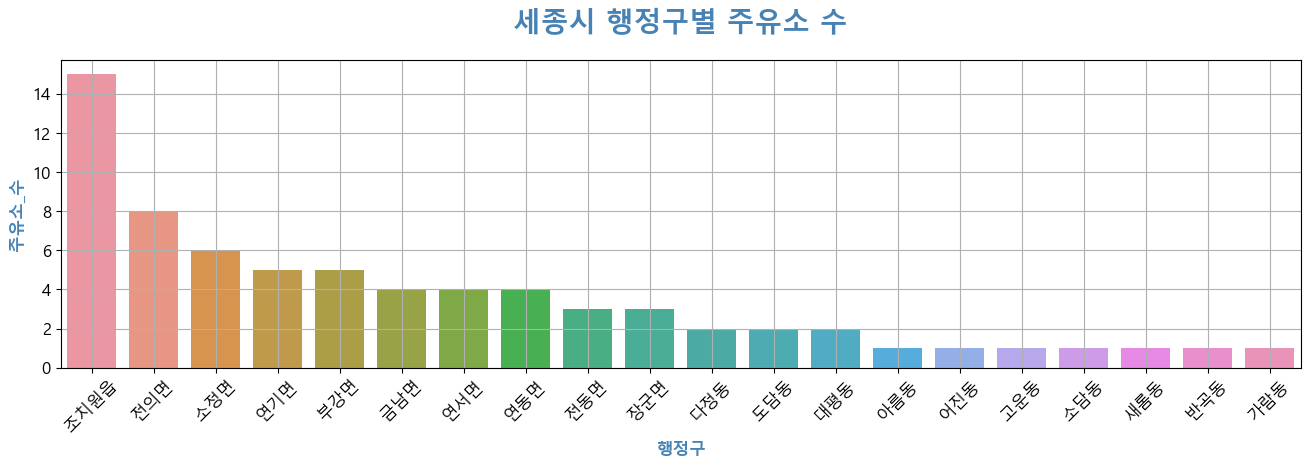

In [10]:
# seaborn 막대그래프 활용하여 시각화 진행

plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.unicode_minus"] = False

plt.rcParams["figure.figsize"]=(16,4)
plt.figure()
plt.title("세종시 행정구별 주유소 수",pad=20,color='steelblue',fontsize=20,fontweight='bold')
sb.barplot(data=cdf,x=cdf['행정구'],y=cdf['count'])
plt.xlabel("행정구",color='steelblue',fontweight='bold')
plt.ylabel("주유소_수",color='steelblue',fontweight='bold')
plt.xticks(rotation=45) # x축 레이블(텍스트)각도 조절
plt.grid()
plt.show()
plt.close()

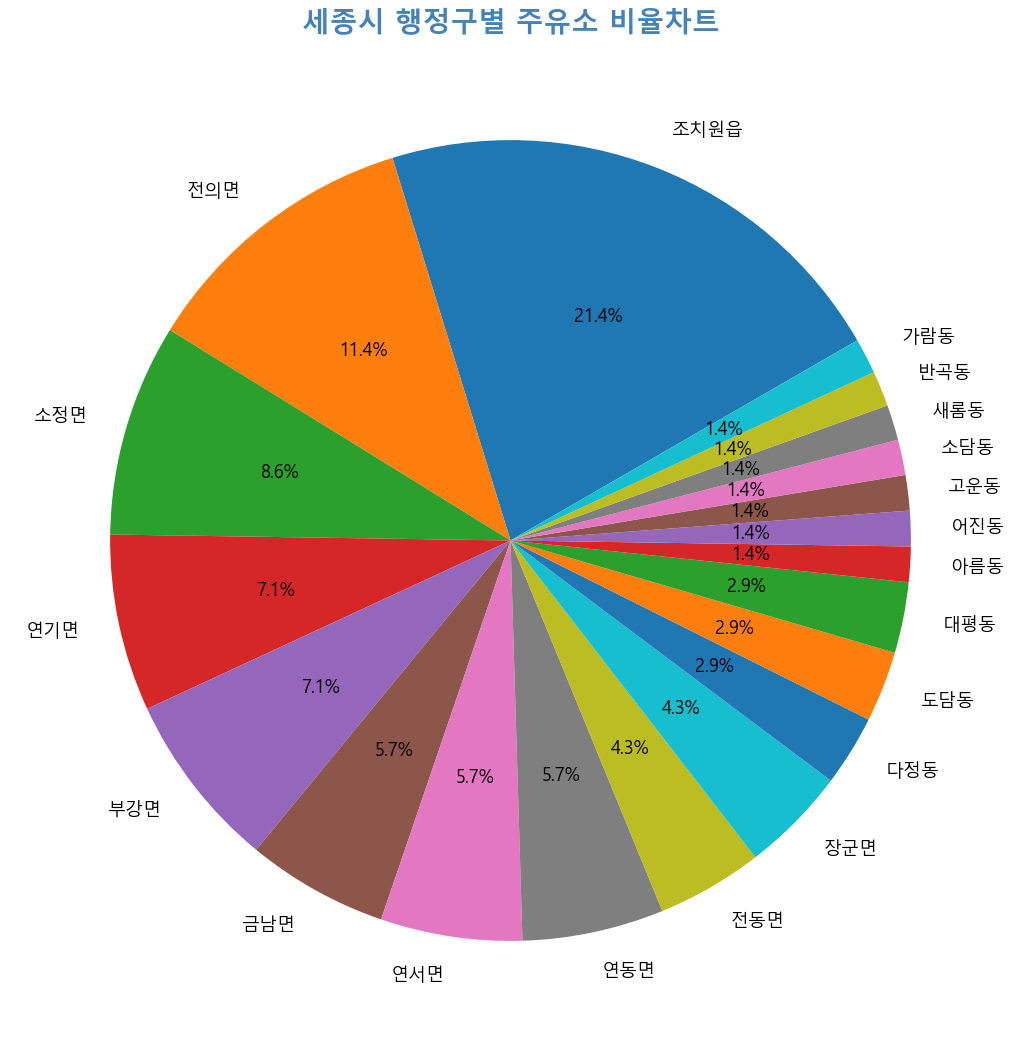

In [11]:
# 파이차트 시각화

colors = ['tomato', 'coral', 'orangered', 'darkorange', 'salmon','lime', 'limegreen', 'chartreuse', 'greenyellow']
plt.rcParams["font.size"] = 13
plt.rcParams["figure.figsize"] = (13, 13)
plt.figure()
plt.title("세종시 행정구별 주유소 비율차트",color='steelblue',fontweight='bold',fontsize=20)
plt.pie(cdf['count'], labels=cdf['행정구'], autopct='%0.1f%%',startangle=30)
plt.show()
plt.close()

> 파이차트 확인 결과 조치원읍, 전의면, 소정면, 연기면 4곳에서 전체 주유소의 약 50%정도를 차지하고 있다.